In [1]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as mt

In [2]:
df=pd.read_excel(r'C:\Users\hp\OneDrive\Desktop\Pizza Sales.xlsx')
df.head(2)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,...,1.2,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,...,0.8,February,Online,12.0,13.0,False,12,3,20,28.186275


In [3]:
df.columns

Index(['Order ID', 'Restaurant Name', 'Location', 'Order Time',
       'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type',
       'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method',
       'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)',
       'Topping Density', 'Order Month', 'Payment Category',
       'Estimated Duration (min)', 'Delay (min)', 'Is Delayed',
       'Pizza Complexity', 'Traffic Impact', 'Order Hour',
       'Restaurant Avg Time'],
      dtype='object')

In [4]:
df.drop(['Order ID','Traffic Level',
         'Distance (km)','Restaurant Avg Time',
        'Toppings Count','Topping Density',
        'Estimated Duration (min)','Pizza Complexity',
        'Order Month','Delivery Efficiency (min/km)','Traffic Impact','Delay (min)'],axis=1,inplace=True)

In [5]:
df.isnull().sum()

Restaurant Name            0
Location                   0
Order Time                 0
Delivery Time              0
Delivery Duration (min)    0
Pizza Size                 0
Pizza Type                 0
Payment Method             0
Is Peak Hour               0
Is Weekend                 0
Payment Category           0
Is Delayed                 0
Order Hour                 0
dtype: int64

In [6]:
def pizza(store):
    if store=='Marco’s Pizza':
        return "Marco's Pizza"
    else:
        return store

In [7]:
df['Restaurant Name']=df['Restaurant Name'].apply(pizza)

In [8]:
df['Restaurant Name'].value_counts()

Restaurant Name
Domino's          212
Papa John's       204
Little Caesars    199
Marco's Pizza     195
Pizza Hut         194
Name: count, dtype: int64

In [9]:
def large(xl):
    if xl=='XL':
        return 'Extra-Large'
    else:return xl

In [10]:
df['Pizza Size']=df['Pizza Size'].apply(large)

In [11]:
df['Pizza Size'].value_counts()

Pizza Size
Medium         429
Large          240
Extra-Large    203
Small          132
Name: count, dtype: int64

In [12]:
df['Pizza Type'].value_counts()

Pizza Type
Non-Veg          216
Veg              202
Cheese Burst     188
Vegan            132
Sicilian          64
BBQ Chicken       54
Margarita         54
Gluten-Free       41
Thai Chicken      24
Stuffed Crust     21
Deep Dish          6
Thin Crust         2
Name: count, dtype: int64

In [13]:
pd.set_option('display.max.columns',200)

In [15]:
df.dtypes

Restaurant Name                    object
Location                           object
Order Time                 datetime64[ns]
Delivery Time              datetime64[ns]
Delivery Duration (min)             int64
Pizza Size                         object
Pizza Type                         object
Payment Method                     object
Is Peak Hour                         bool
Is Weekend                           bool
Payment Category                   object
Is Delayed                           bool
Order Hour                          int64
dtype: object

##### What is the total number of order placed on size and type ??

In [16]:
piz_type=df['Pizza Type'].value_counts().sort_values(ascending=False)
piz_type

Pizza Type
Non-Veg          216
Veg              202
Cheese Burst     188
Vegan            132
Sicilian          64
BBQ Chicken       54
Margarita         54
Gluten-Free       41
Thai Chicken      24
Stuffed Crust     21
Deep Dish          6
Thin Crust         2
Name: count, dtype: int64

In [17]:
size=df['Pizza Size'].value_counts()
size

Pizza Size
Medium         429
Large          240
Extra-Large    203
Small          132
Name: count, dtype: int64

Text(0, 0.5, '')

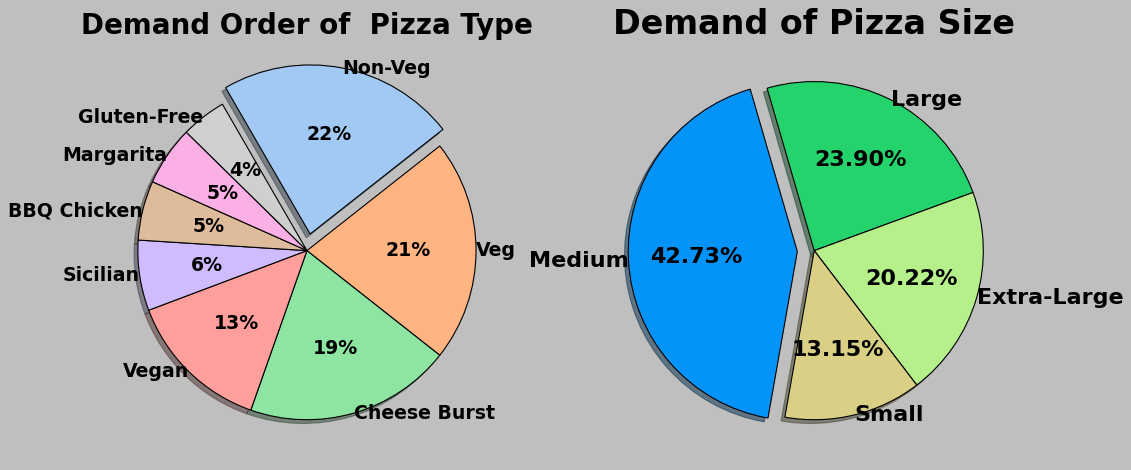

In [75]:
mt.style.use('fast')

mt.figure(figsize=(15,20))
mt.subplot(2,2,1)
palette=sea.color_palette('pastel')
piz_type[:-4].plot(kind='pie',startangle=120,autopct="%0.d%%",
                   shadow=True,
                   counterclock=False,
                   wedgeprops={'edgecolor':"black"},textprops={'fontweight':"bold",'size':17},
                  explode=[0.1,0,0,0,0,0,0,0],colors=palette,labeldistance=1)

mt.title('Demand Order of  Pizza Type',fontweight='heavy',size=25)
mt.ylabel('')



mt.subplot(2,2,2)
palette_2=sea.color_palette('terrain')
size.plot(kind='pie',startangle=-100,autopct="%0.2f%%",
          shadow=True,
          counterclock=False,
          wedgeprops={'edgecolor':"black"},
          explode=[0.1,0,0,0],
          colors=palette_2,textprops={'fontweight':"heavy",'size':20},labeldistance=1)

mt.title('Demand of Pizza Size',size=30,fontweight='bold')
mt.ylabel('')

In [20]:
df['Restaurant Name'].value_counts()

Restaurant Name
Domino's          212
Papa John's       204
Little Caesars    199
Marco's Pizza     195
Pizza Hut         194
Name: count, dtype: int64

In [22]:
df.dtypes

Restaurant Name                    object
Location                           object
Order Time                 datetime64[ns]
Delivery Time              datetime64[ns]
Delivery Duration (min)             int64
Pizza Size                         object
Pizza Type                         object
Payment Method                     object
Is Peak Hour                         bool
Is Weekend                           bool
Payment Category                   object
Is Delayed                           bool
Order Hour                          int64
dtype: object

In [23]:
df['weekdays']=df['Order Time'].dt.weekday

In [25]:
def week(days):
    if days ==0:
        return 'sunday'.title()
    elif days==1:
        return 'monday'.title()
    elif days==2:
        return 'tuesday'.title()
    elif days==3:
        return 'wednesday'.title()
    elif days==4:
        return 'thursday'.title()
    elif days==5:
        return 'friday'.title()
    elif days==6:
        return 'saturday'.title()
    else:return 0

In [26]:
df['weekdays']=df['weekdays'].apply(week)

###  How many Pizza sell on Location Base ???

In [28]:
locate=df['Location'].value_counts().sort_values(ascending=False)
locate.head(10)

Location
Atlanta, GA        78
Milwaukee, WI      71
Louisville, KY     69
Omaha, NE          68
Albuquerque, NM    59
Boston, MA         51
Dallas, TX         50
Miami, FL          49
Denver, CO         46
Chicago, IL        45
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Bustiest Location')

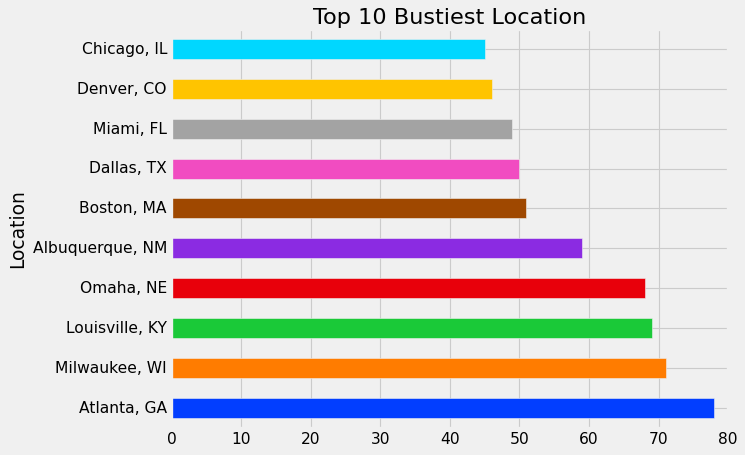

In [29]:
mt.style.use('fivethirtyeight')
p_1=sea.color_palette('bright')
locate.head(10).plot(kind='barh',color=p_1)

mt.title('Top 10 Bustiest Location')

In [31]:
df['Year']=df['Order Time'].dt.year

### How many Pizza Sold in Year ???

In [33]:
year_wise=df['Year'].value_counts()
year_wise

Year
2024    443
2025    373
2026    188
Name: count, dtype: int64

Text(0, 0.5, ' ')

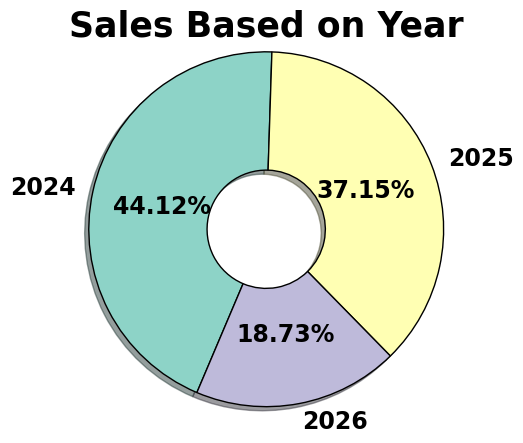

In [34]:
mt.style.use('default')
p_1=sea.color_palette('Set3')
year_wise.plot(kind='pie',startangle=-113,counterclock=False,textprops={'fontweight':"bold",'size':17},autopct="%0.2f%%",shadow=True,
              wedgeprops={'edgecolor':'black','width':0.8},pctdistance=0.6,radius=1.2,colors=p_1)
mt.title('Sales Based on Year',fontweight='bold',size=25)
mt.ylabel(' ')
# mt.xticks(fontweight='bold',size=2

In [35]:
df['Month']=df['Order Time'].dt.month

In [36]:
df.reset_index(False,inplace=True)

In [37]:
df['Quarter']=df['Order Time'].dt.quarter

In [38]:
def tr(qtr):
    if qtr==1:
        return 'Q1'
    elif qtr==2:
        return 'Q2'
    elif qtr==3:
        return 'Q3'
    elif qtr==4:
        return 'Q4'
    else:return 0

In [39]:
df.head(2)

,index,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Payment Method,Is Peak Hour,Is Weekend,Payment Category,Is Delayed,Order Hour,weekdays,Year,Month,Quarter
0,0,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,Card,True,False,Online,False,18,Thursday,2024,1,1
1,1,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,Wallet,True,False,Online,False,20,Tuesday,2024,2,1


In [40]:
df['Quarter']=df['Quarter'].apply(tr)

In [41]:
df.groupby(['Year','Quarter'])['Pizza Type'].count()

Year  Quarter
2024  Q1          88
      Q2          48
      Q3         192
      Q4         115
2025  Q1          90
      Q2         111
      Q3          72
      Q4         100
2026  Q1          90
      Q2          91
      Q3           7
Name: Pizza Type, dtype: int64

In [42]:
df.set_index('Order Time',inplace=True)

In [43]:
qtr_24=df.loc['2024'].groupby('Quarter')['Pizza Type'].count()
qtr_24

Quarter
Q1     88
Q2     48
Q3    192
Q4    115
Name: Pizza Type, dtype: int64

In [44]:
qtr_25=df.loc['2025'].groupby('Quarter')['Pizza Type'].count()
qtr_25

Quarter
Q1     90
Q2    111
Q3     72
Q4    100
Name: Pizza Type, dtype: int64

Text(0.5, 0, 'Quarters')

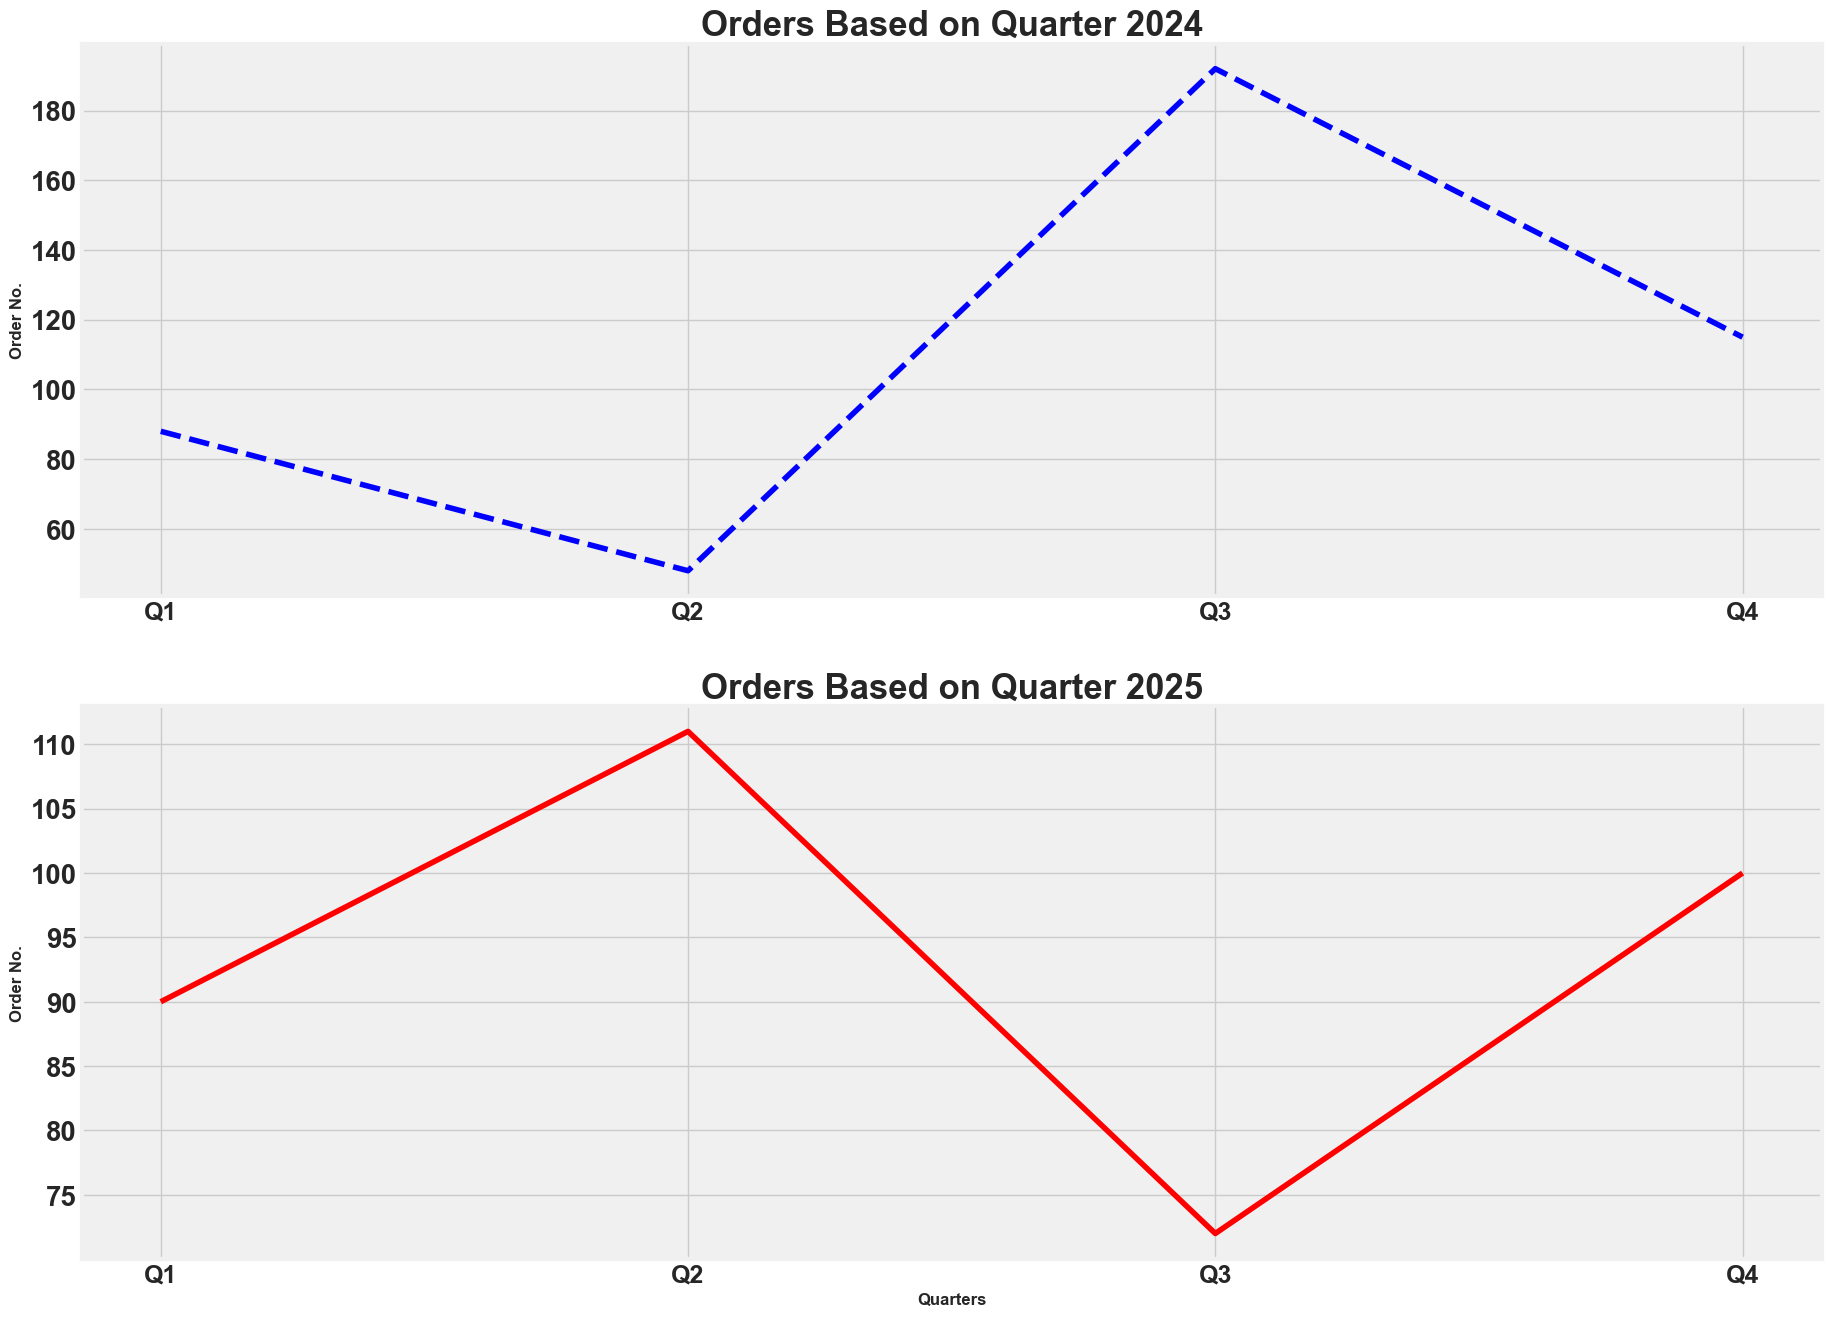

In [72]:
mt.figure(figsize=(20,15))
# sea.set_style('dark')
mt.style.use('fivethirtyeight')

mt.subplot(2,1,1)
sea.lineplot(data=qtr_24,linestyle="--",color='blue',estimator=sum)

mt.title('Orders Based on Quarter 2024',fontweight='heavy',size=25)

mt.xticks(fontweight='heavy',size=18)
mt.yticks(fontweight='heavy',size=20)

mt.ylabel('Order No.',fontweight='heavy',size=12)
mt.xlabel(' ')

mt.subplot(2,1,2)
sea.lineplot(data=qtr_25,color='red',estimator=sum)

mt.title('Orders Based on Quarter 2025',fontweight='heavy',size=25)

mt.xticks(fontweight='heavy',size=18)
mt.yticks(fontweight='heavy',size=20)
mt.ylabel('Order No.',fontweight='heavy',size=12)
mt.xlabel('Quarters',fontweight='bold',size=12)

In [46]:
def momos(mon):
    if mon==1:
        return "jan".upper()
    elif mon==2:
        return 'feb'.upper()
    elif mon==3:
        return 'mar'.upper()
    elif mon==4:
        return 'apr'.upper()
    elif mon==5:
        return 'may'.upper()
    elif mon==6:
        return 'jun'.upper()
    elif mon==7:
        return "jul".upper()
    elif mon==8:
        return 'aug'.upper()
    elif mon==9:
        return 'sep'.upper()
    elif mon==10:
        return 'oct'.upper()
    elif mon==11:
        return 'nov'.upper()
    elif mon==12:
        return 'dec'.upper()
    else:return 0
        

In [47]:
df['Month']=df['Month'].apply(momos)

In [48]:
mon_24=df.loc['2024'].groupby('Month').Location.count()
mon_24.head(2)

Month
APR    31
AUG    86
Name: Location, dtype: int64

In [49]:
mon_25=df.loc['2025'].groupby('Month').Location.count()
mon_25.head(2)

Month
APR    30
AUG    31
Name: Location, dtype: int64

In [50]:
MONOR=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

### What are monthly sales of 2024 and 2025 ???

C:\Users\hp\AppData\Local\Temp\ipykernel_4000\3873487424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mo_24=sea.barplot(data=mon_24,order=MONOR,palette='CMRmap',saturation=5,hatch='-',edgecolor='black',linewidth=2)
C:\Users\hp\AppData\Local\Temp\ipykernel_4000\3873487424.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  mo_25=sea.barplot(data=mon_25,order=MONOR,palette='magma',hatch='/',edgecolor='white',saturation=5)


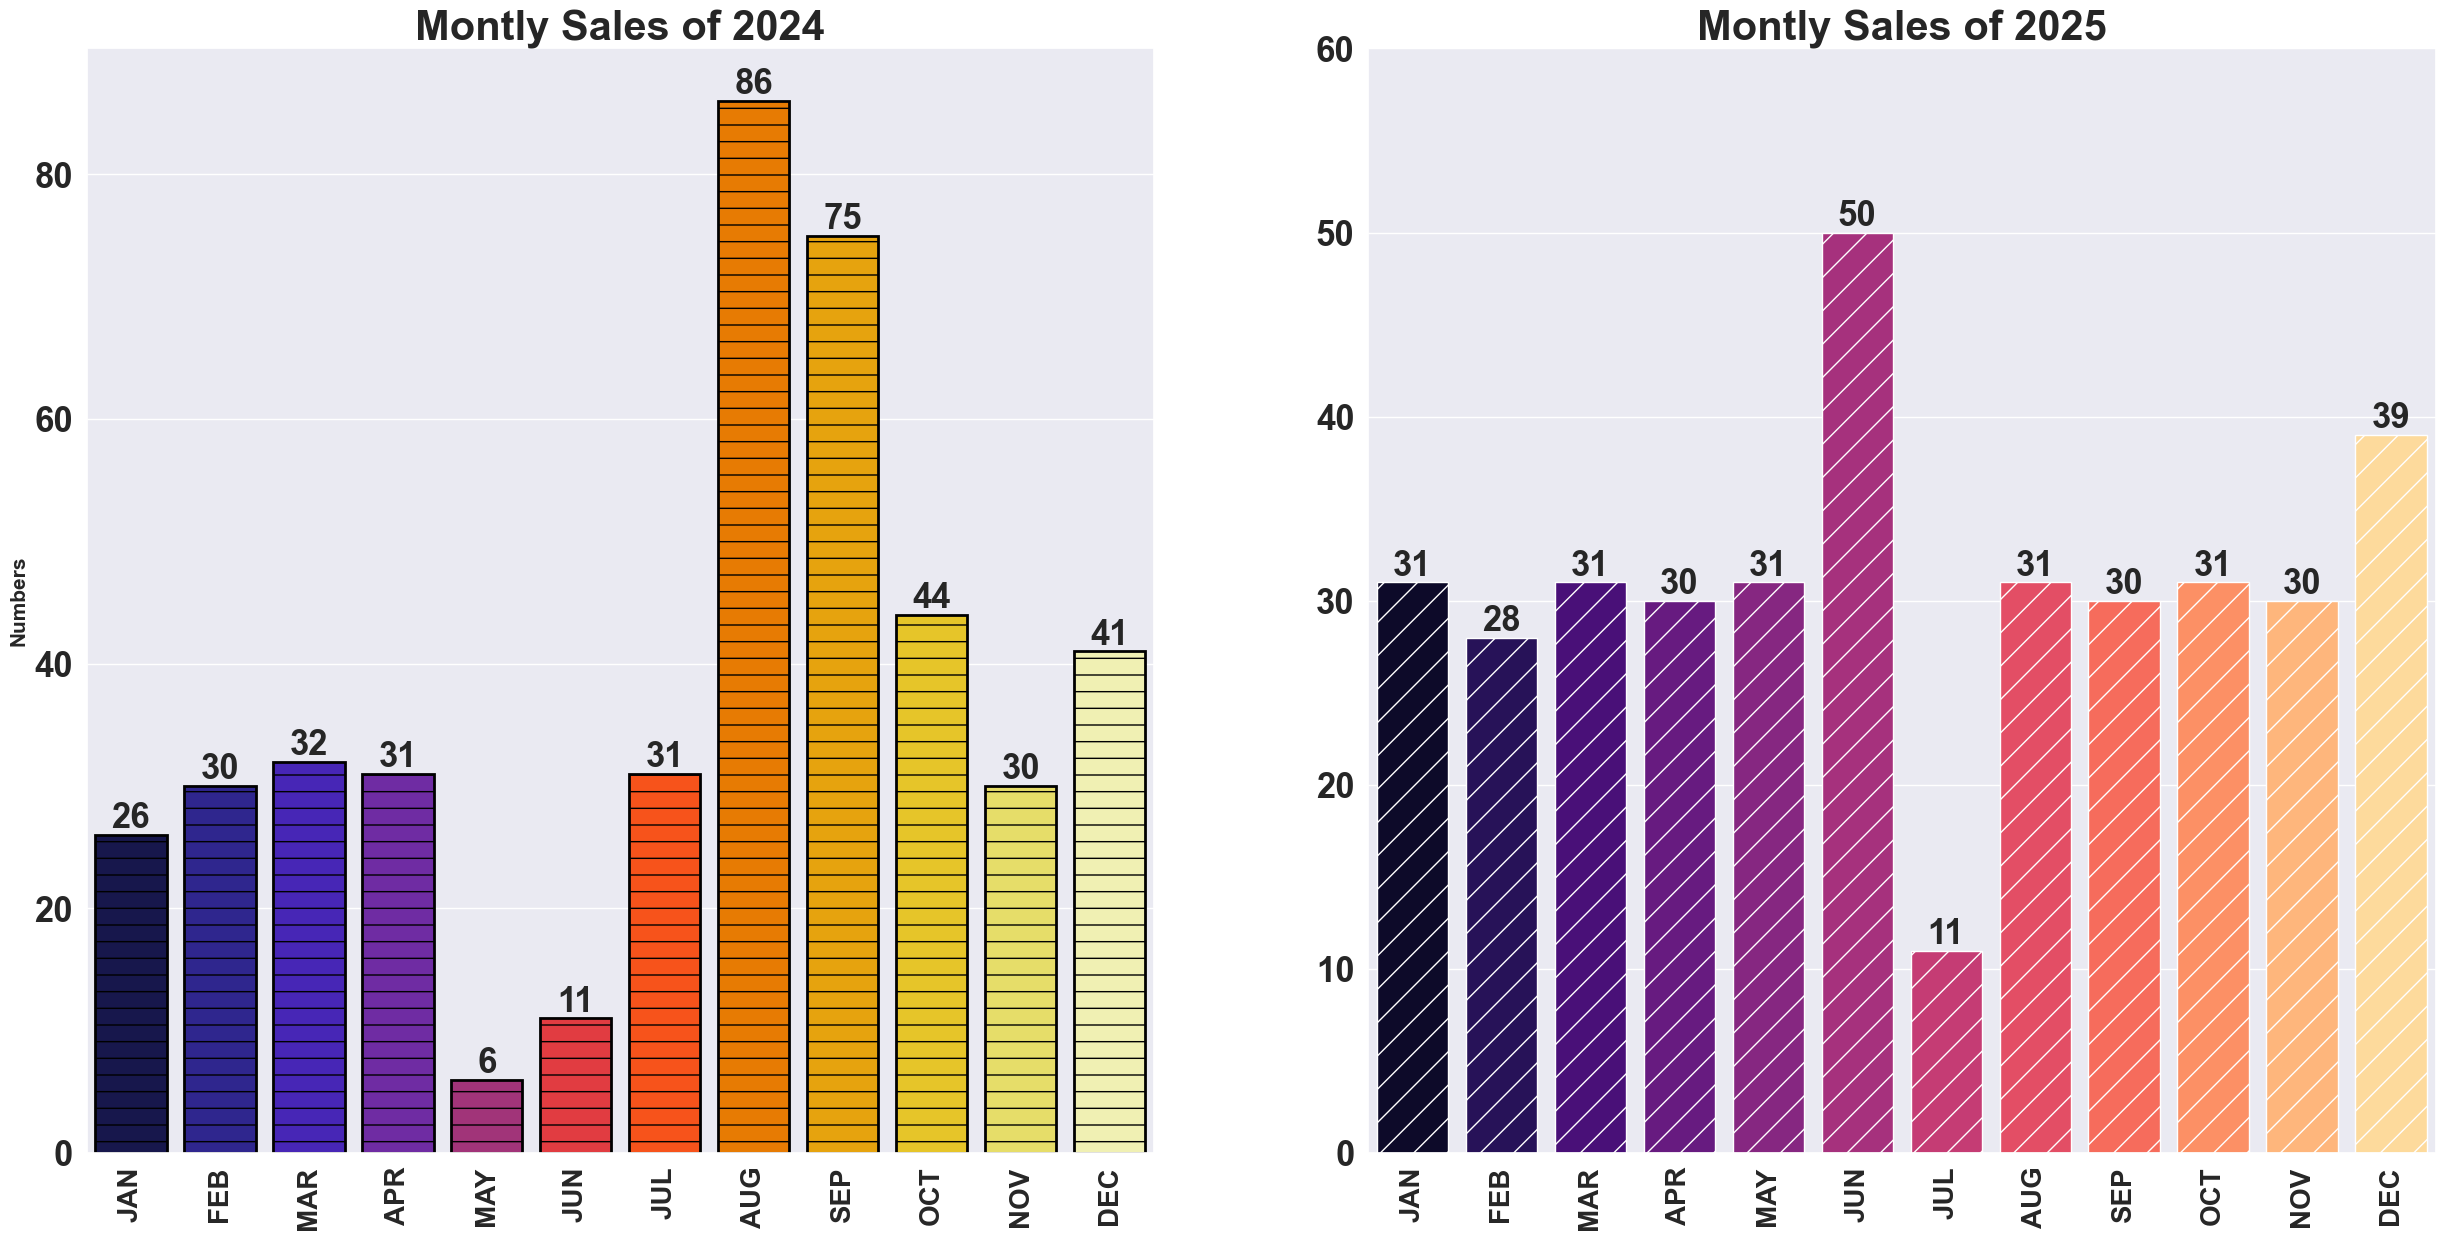

In [51]:
sea.set_style('darkgrid')
sea.set_context('notebook')

mt.figure(figsize=(27,30))

mt.subplot(2,2,1)
mo_24=sea.barplot(data=mon_24,order=MONOR,palette='CMRmap',saturation=5,hatch='-',edgecolor='black',linewidth=2)

mt.title('Montly Sales of 2024',fontweight='demibold',size=30)
mt.xticks(rotation=90,fontweight='heavy',size=20)
# mt.xticks(rotation=90,fontweight='heavy',size=20)
mt.yticks(fontweight='bold',size=25)
mt.xlabel(' ')
mt.ylabel('Numbers',fontweight='demibold',size=15)

mt.subplot(2,2,2)
mo_25=sea.barplot(data=mon_25,order=MONOR,palette='magma',hatch='/',edgecolor='white',saturation=5)

mt.title('Montly Sales of 2025',fontweight='demibold',size=30)
mt.xticks(rotation=90,fontweight='heavy',size=20)
mt.yticks(fontweight='bold',size=25)
mt.xlabel(' ')
mt.ylabel(' ')
mt.ylim(0,60)

for m_24 in mo_24.containers:
    mo_24.bar_label(m_24,fontweight='demibold',size=25)

for m_25 in mo_25.containers:
    mo_25.bar_label(m_25,fontweight='demibold',size=25)

In [76]:
df['weekdays'].value_counts()

weekdays
Wednesday    147
Saturday     145
Tuesday      144
Thursday     143
Sunday       143
Friday       141
Monday       141
Name: count, dtype: int64

### What are the busiest hours for the order placement ???

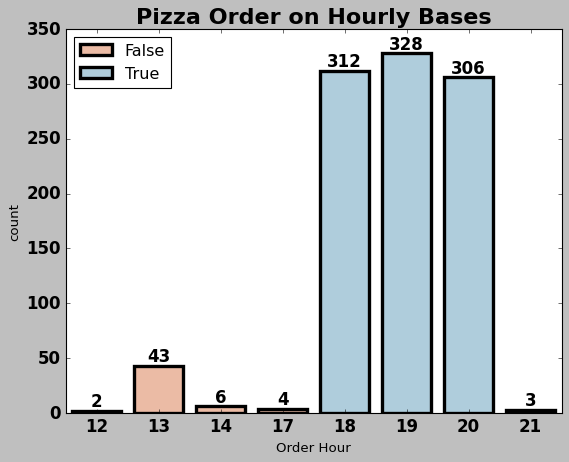

In [73]:
mt.style.use('classic')


hour_or=sea.countplot(data=df,x='Order Hour',hue='Is Peak Hour',palette='RdBu',linewidth=3,edgecolor='black')
mt.title('Pizza Order on Hourly Bases',size=20,fontweight='bold')
mt.xticks(size=15,fontweight='heavy')
mt.yticks(size=15,fontweight='heavy')
mt.legend(loc=2,fontsize='large')

for hor in hour_or.containers:
    hour_or.bar_label(hor,fontweight='bold',size=15)

In [53]:
# df.reset_index(False,inplace=True)

In [54]:
# df.head(2)

In [55]:
# df[df['Pizza Size'].duplicated(keep=False)]

In [56]:
# df.loc[(df['Pizza Size'].duplicated(keep=False)),['Pizza Size']]

In [57]:
# df.loc[(df['Restaurant Name'].duplicated(keep=False)),['Restaurant Name']].value_counts()

In [58]:
# df.duplicated(subset=['Pizza Type'],keep=False)

In [59]:
# df['Weekdays']=df['Order Time'].dt.weekday

In [60]:
# df['Hour']=df['Order Time'].dt.hour

In [61]:
# df[['Weekdays','Hour']]

In [62]:
# df.pivot_table(index='weekdays',columns='Hour',values='Pizza Type',aggfunc='count')

In [63]:
# ordor=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [64]:
# sea.plot(data=df,x='weekdays',y='Hour')

In [65]:
# sea.set_style('darkgrid')
# sea.set_context('notebook')
# mt.figure(figsize=(18,12))
# month_sort=['January','February','March','April','May','June','July','August','September','October','November','December']
# montly_order=sea.countplot(data=df,x='Order Month',palette='twilight',order=month_sort)

# mt.title('Montly Order Sales',fontweight='bold',size=20)
# mt.xticks(rotation=0,fontweight='bold',size=16)
# mt.yticks(fontweight='bold',size=20)

# for month in montly_order.containers:
#     montly_order.bar_label(month,fontweight='heavy',size=20)

In [66]:
# df['Quarter'].value_counts(normalize=True)

In [67]:
#df.groupby('Quarter')['Pizza Type'].count().pct_change()*100

In [68]:
# df.groupby('Quarter')['Pizza Type'].count().pct_change()

In [69]:
# df.groupby('Quarter')['Pizza Type'].count()/len(df.groupby('Quarter')['Pizza Type'].count()*100)